## MINI PROJECT - DATA ANALYTICS

In [29]:
x = [24, 22, 32, 59, 99, 59, 76, 83, 21, 95, 57]
df = pd.DataFrame({'x' : x})

In [33]:
df.mean()

x    57.0
dtype: float64

> ### OBJECTIVE:
> - To demonstrate practical skills in data preprocessing and descriptive analysis.
>
> ### DATASET:
> - The Melbourne Housing Market dataset, available at [Kaggle - Melbourne Housing](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/data).

### BACKGROUND

Melbourne is currently experiencing a housing bubble (some experts say it may burst soon). Maybe you can find a trend to this matter? Which suburbs are the best to buy in? Which ones are value for money? Where's the expensive side of town? And more importantly where should you buy a 2 bedroom unit?

### CONTENT & ACKNOWLEDGEMENTS
This data was scraped from publicly available results posted every week from Domain.com.au, it's cleaned, but you should check it properly to make sure the data analysis is valid.

The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

### DATA DICTIONARY AND KEY DETAILS

- **Suburb:** Suburb
- **Address:** Address
- **Rooms:** Number of rooms
- **Price:** Price in Australian dollars

- **Method:**
**S** - property sold;
**SP** - property sold prior;
**PI** - property passed in;
**PN** - sold prior not disclosed;
**SN** - sold not disclosed;
**NB** - no bid;
**VB** - vendor bid;
**W** - withdrawn prior to auction;
**SA** - sold after auction;
**SS** - sold after auction price not disclosed.
**N/A** - price or highest bid not available.

- **Type:**
**br** - bedroom(s);
**h** - house,cottage,villa, semi,terrace;
**u** - unit, duplex;
**t** - townhouse;
**dev site** - development site;
**o res** - other residential.

- **SellerG:** Real Estate Agent
- **Date:** Date sold
- **Distance:** Distance from CBD in Kilometres
- **Regionname:** General Region (West, North West, North, North east …etc)
- **Propertycount:** Number of properties that exist in the suburb.
- **Bedroom2:** Scraped # of Bedrooms (from different source)
- **Bathroom:** Number of Bathrooms
- **Car:** Number of carspots
- **Landsize:** Land Size in Metres
- **BuildingArea:** Building Size in Metres
- **YearBuilt:** Year the house was built
- **CouncilArea:** Governing council for the area
- **Lattitude:** Self explanitory
- **Longtitude:** Self explanitory

### 1. DATA QUALITY ASSESSMENT
> Load the dataset into a suitable data structure.
>
> Perform an initial inspection of the dataset, and identify:
> - Number of rows and columns.
> - Data types of each column.
> - Missing values of each column.
> - Any initial observations or issues you notice (if any).

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
df = pd.read_csv("Data/melb_data_project.csv")

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/2017,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [4]:
# check the shape of data
df.shape

(13580, 21)

> There are 13580 rows and 21 columns in this data.

In [5]:
# check data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

> From our observation, there are 2 columns that have an incorrect data type, namely date and yearbuilt column, which should be datetime data type. We will handle this in the Data Type Transformation section.

In [6]:
# chcek the missing values
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

> There are missing values in several columns, including the car column as many as 62, the BuildingArea column as many as 6450, the yearBuilt column as many as 5375, and the last column CouncilArea as many as 1369.

### 2. DATA TYPE TRANSFORMATION
> Identify columns that are not of the appropriate data type:
> - Suggest a more suitable data type for these columns.
> - Transform the identified columns to the suggested data types.

> As previosly mentioned in the previous section, there are two columns which uses the wrong data type. These columns are 'Date' and 'YearBuilt'. Both of these column are supposed to be datetime data type, as they display the date sold and the year built respectively.

In [7]:
#convert date and yearbuilt to datetime data type
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
df['YearBuilt'] = pd.to_datetime(df['YearBuilt'], errors='coerce', format = '%Y')

### 3. MISSING VALUES HANDLING
> For each missing values in each column:
> - Identify any columns that have missing values, you can also show the number and percentage of missing values.
> - Propose and justify your chosen method(s) for handling the missing values in each column.
> - Implement your chosen method(s) to handle the missing values.

In [8]:
# check the missing values
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5376
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [9]:
# show percentage of missing values
missing_values = df.isnull().sum()
total_values = df.shape[0]

# percentage of missing values
percentage_missing = round((missing_values / total_values) * 100, 2)

print(percentage_missing)

Suburb            0.00
Address           0.00
Rooms             0.00
Type              0.00
Price             0.00
Method            0.00
SellerG           0.00
Date              0.00
Distance          0.00
Postcode          0.00
Bedroom2          0.00
Bathroom          0.00
Car               0.46
Landsize          0.00
BuildingArea     47.50
YearBuilt        39.59
CouncilArea      10.08
Lattitude         0.00
Longtitude        0.00
Regionname        0.00
Propertycount     0.00
dtype: float64


> Form the observation above, there are 4 columns that have missing values. We need to handle these missing values as they will skew our analysis if we don't handle them.

#### Identify The Missing Values of 'Car'

In [10]:
# see the distict values and its frequency
df['Car'].value_counts()

Car
2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: count, dtype: int64

In [11]:
# drop the missing values
df = df.dropna(subset=['Car'])

> From above we can assume that the missing values are predicted Missing At Random (MAR) or Missing At Completely At Random (MCAR). It is not actually clear which one suit the type of missing values but we can conclude that it doesn't depend on the values of the missing data themselves. In other hand, we can say that the missing values are independent.
>
> The missing values of variable 'Car' is only 0.46% of the dataset, the best possible way to handle is dropping the rows. Following the action, we suppose that the missing values that dropped will not affect the future analysis.

###Handling Missing Values in 'BuildingArea'

In [12]:
# group data by Landsize and calculate the median BuildingArea for each Landsize group
landsize_grouping = pd.cut(df['Landsize'],[0,250,500,750,1000,5000, 10000, 20000, 37000])
buildingarea_grouped = df.groupby(landsize_grouping)['BuildingArea'].median()

In [13]:
# imputing data with median from grouping data
df['BuildingArea'] = df['BuildingArea'].fillna(buildingarea_grouped)

> From the data above we can assume that the missing value from "BuildingArea" column are predicted Missing At Random (MAR). The "BuildingArea" column has the highest percentage of missing values, which is 47.5%. Therefore we used method of imputing the median value of landsize so that the data does not become biased.


###Handling Missing Values in 'YearBuilt'

In [14]:
# dropping entire column (YearBuilt)
df = df.dropna(subset=['YearBuilt'])

> From the information above, it is known that the percentage of missing values ​​in the 'YearBuilt' column is also quite high, namely 39.5%. The choice we made was dropping the row. This decision does not sacrifice important information or significantly affect the results of the analysis.

#### Handling Missing values in CouncilArea

In [15]:
# most common value of `CouncilArea` within each group of `Regionname`
df.groupby('Regionname')['CouncilArea'].apply(lambda x: x.value_counts().idxmax())

Regionname
Eastern Metropolitan                Banyule
Eastern Victoria               Yarra Ranges
Northern Metropolitan              Moreland
Northern Victoria                    Melton
South-Eastern Metropolitan         Kingston
Southern Metropolitan            Boroondara
Western Metropolitan          Moonee Valley
Western Victoria                     Melton
Name: CouncilArea, dtype: object

In [16]:
# filling the missing values with the most common value of `CouncilArea` within each group of `Regionname`
df['CouncilArea'] = df['CouncilArea'].fillna(df.groupby('Regionname')['CouncilArea'].transform(lambda x: x.mode()[0]))

> For the missing values in this column, we concluded that it is Missing At Random (MAR). After further discussion, we decided to fill these missing values by referencing the most common council area by each region name. The council area isn't a relevant column for our analysis, so handling this way won't skew our analysis.

> #### Check for Missing Values after handling

In [17]:
# check data after handling missing values
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

### 4. DETECTING AND HANDLING OUTLIERS
> Using suitable techniques, identify columns that have outliers:
> - Report these columns and the number of outliers detected.
> - Propose a strategy to handle the outliers. Justify your choice of strategy.
> - Implement the chosen strategies to handle the outliers.

In [18]:
# numerical columns
df_num = df.select_dtypes(['int64', 'float64'])
df_num.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount
1,2,1035000,2.5,3067,2,1,0.0,156,79.0,-37.8079,144.9934,4019
2,3,1465000,2.5,3067,3,2,0.0,134,150.0,-37.8093,144.9944,4019
4,4,1600000,2.5,3067,3,1,2.0,120,142.0,-37.8072,144.9941,4019
6,3,1876000,2.5,3067,4,2,0.0,245,210.0,-37.8024,144.9993,4019
7,2,1636000,2.5,3067,2,1,2.0,256,107.0,-37.8060,144.9954,4019


> #### Detecting Outliers

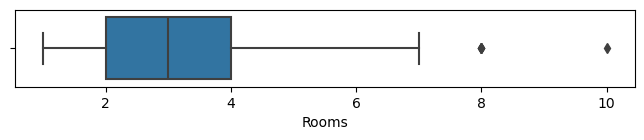

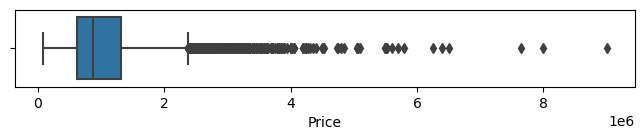

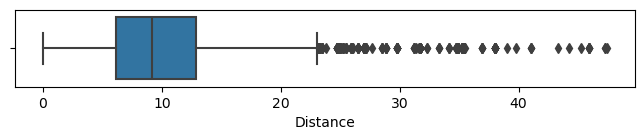

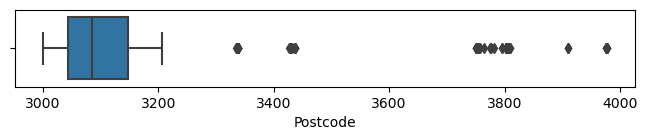

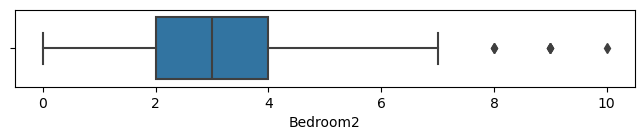

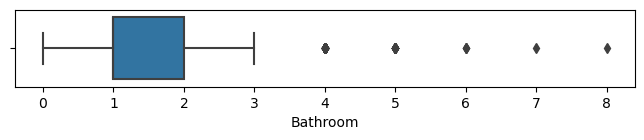

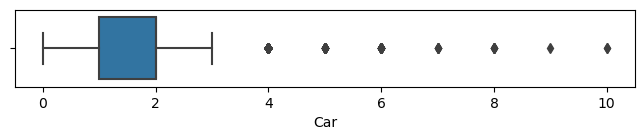

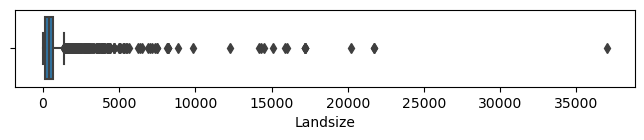

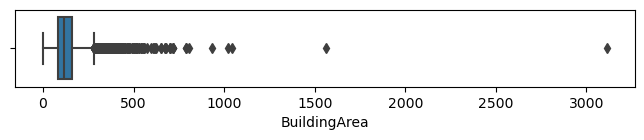

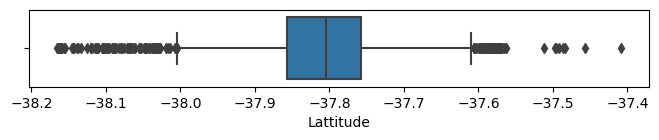

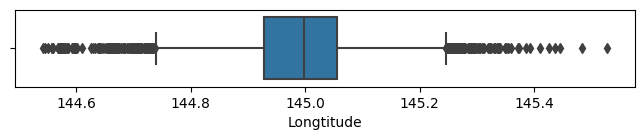

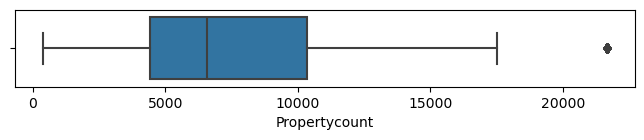

In [19]:
# detecting outliers using boxplot method
for i in df_num:
    plt.figure(figsize = (8,1))
    sns.boxplot(data = df_num, x = i)
    plt.show()

In [20]:
# define outlier detection function
def find_outlier(yourList):
    Q1 = np.quantile(yourList, .25)
    Q3 = np.quantile(yourList, .75)

    IQR = Q3 - Q1
    min_IQR = Q1 - (IQR * 1.5)
    max_IQR = Q3 + (IQR * 1.5)

    outlier = []
    for i in yourList:
        if i > max_IQR:
            outlier.append(i)
        if i < min_IQR:
            outlier.append(i)
    return outlier

In [21]:
# find total outlier and percentage of outlier in each column
for i in df_num:
    total = find_outlier(df_num[i])
    percentage = round(len(total) / len(df_num[i]) * 100, 2)
    print(f'{i}: {len(total)} || {percentage}%')

Rooms: 5 || 0.06%
Price: 383 || 4.69%
Distance: 267 || 3.27%
Postcode: 129 || 1.58%
Bedroom2: 6 || 0.07%
Bathroom: 103 || 1.26%
Car: 359 || 4.39%
Landsize: 223 || 2.73%
BuildingArea: 377 || 4.61%
Lattitude: 179 || 2.19%
Longtitude: 264 || 3.23%
Propertycount: 203 || 2.48%


> To detect outliers in our dataset, we used the boxplot method. The boxplot method is a commonly used method in statistics to detect outliers. We also defined a function to show the outliers in each column. This defined function works the same way as the boxplot method, which utilizes the quartile of the data in each column.
> From our observation, there seems to be not that many outliers in our data. Proven by none of them reaching even 5% of the data.

> #### Outliers Handling Strategy
> After detecting them, we would now need to find a strategy to handle these outliers. We propose these strategies to handle the outliers in each column:
>
> Keeping them:
> - `Postcode`: Eventhough it is an integer, postcode functions as a categorical data to show the area where the property is located. This column doesn't affect our analysis. So, we will keep it.
> - `Lattitude`: Lattitude is just a data that show the coordinate of the property. This column doesn't affect our analysis. So, we will keep it.
> - `Longtitude`: Lattitude is just a data that show the coordinate of the property. This column doesn't affect our analysis. So, we will keep it.
> - `Propertycount`: Propertycount shows the original total property in each suburb. This column doesn't affect our analysis. So, we don't need to update it and we will keep it that way.
> - `Rooms`: Since the sample size of the data is around 8000 rows, removing 5 rows wouldn't have a substantial impact on the analysis. So, we will keep it.
> - `Bedroom`: Since the sample size of the data is around 8000 rows, removing 5 rows wouldn't have a substantial impact on the analysis. So, we will keep it.
> - `Distance`:  This column doesn't affect our analysis. So, we will keep it.
>
>
> Dropping them:
> - `Bathroom`: Since there are 103 outliers, they may affect the mean or median of the column. Especially if we group them up through a categorical data, the sample size will be smaller and these outliers might have a bigger impact on the result. So, we will drop them.
> - `Price`: The price column is a very important aspect of our analysis. Having outliers will certainly affect the result of our analysis. So, we will drop them.
> - `Car`: Since there are 359 outliers, they may affect the mean or median of the column. Especially if we group them up through a categorical data, the sample size will be smaller and these outliers might have a bigger impact on the result. So, we will drop them.
> - `Landsize`: Since we are analyzing property, we think we should keep our sample to properties with similair land sizes to get a more balanced result. So, we will these outliers.
> - `BuildingArea`: Since we are analyzing property, we think we should keep our sample to properties with similair building area to get a more balanced result. So, we will these outliers.

> #### Outliers handling

In [22]:
# dropping the outliers from the aforementioned columns
drop_outlier = df[['Bathroom', 'Price', 'Car', 'Landsize', 'BuildingArea']]

for i in drop_outlier:
    Q1 = np.quantile(df[i], .25)
    Q3 = np.quantile(df[i], .75)

    IQR = Q3 - Q1
    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR

    df = df.drop(df[(df[i] < min_IQR) | (df[i] > max_IQR)].index)

# only run this cell once, as it will affect the dataset if it is run multiple times

### 5. DESCRIPTIVE ANALYSIS
> Explore the data by doing descriptive analysis.
>
> Descriptive Statistics:
> - Compute and report central tendencies (mean, median, mode) for relevant columns.
> - Report dispersions (variance, standard deviation, range) for key numerical columns.
> - Analyze the distribution of key categorical variables, including counts and proportions.
>
> Visual Analysis (optional):
> - Use histograms, box plots, and bar charts to visualize distributions and relationships of key variables.

> #### Computing and Report Central Tendency of Relevant Columns

> <H3> Mean <H3>

In [59]:
# Calculate the mean for values each variable
mean_median = round(df[['Bathroom', 'Price', 'Car', 'Landsize', 'BuildingArea']].agg(['mean','median']), 0)

# Display the mean each variable
print(df_mean)

        Bathroom     Price  Car  Landsize  BuildingArea
mean         1.0  937826.0  1.0     358.0         119.0
median       1.0  837000.0  1.0     314.0         111.0


> Descriptive Analysis Conclusion:
>
> From that information, we know the mean for each variable; Bathroom is 1.0, Price is 937,826, Car is 1.0, Landsize is 358.0, and Building Area is 119.0.
>
> The mean values gives the idea where the most data points cluster around or in this context we can say that it gives a snapshot of typical Houses in Melbourne.
>
> Through that information, we can draw some conclusions as follows:
>
> * The average number of Bathroom Bathroom of Houses in Melbourne is 1;
>
> * The average price of Houses in Melbourne are is around $937,826 ;
>
> * The average carspot of Houses in Melbourne is 1;
>
> * The average landsize of Houses in Melbourne is around 358 meters;
>
> * The average building area of Houses in Melbourne is around 119 meters.

> <H3> Median <H3>

In [24]:
# Calculate the median values for each variable
df_median = df[['Bathroom', 'Price', 'Car', 'Landsize', 'BuildingArea']].median()

# Display the median for each variable
print(df_median)

Bathroom             1.0
Price           837000.0
Car                  1.0
Landsize           314.0
BuildingArea       111.0
dtype: float64


> Descriptive Analysis Conclusion:
>
> From that information, we know the median for each variable; Bathroom is 1, Price is 837,000, Car is 1.0, Landsize is 314.0, and Building Area is 111.0.
>
> The median values gives the measure of the middle value of a dataset that isn't influenced by the extreme values of outliers. We can rely on this information better than the mean values. In this context, it implies that the median values will give more accuracy about Houses in Melbourne.
>
> Through that information, we can draw some conclusions as follows:
>
> * The median number of Bathroom Bathroom of Houses in Melbourne is 1;
>
> * The median price of Houses in Melbourne are is around $837,000;
>
> * The median  carspot of Houses in Melbourne is 1;
>
> * The median landsize of Houses in Melbourne is around 314 meters;
>
> * The median building area of Houses in Melbourne is around 111 meters.

> <H3>Mode<H3>

In [63]:
# assign columns
columns_mode = ['Bathroom', 'Price', 'Car', 'BuildingArea','Suburb','CouncilArea','Regionname']

# Calculate the mode values for each variable (numeric)
df_mode = df[columns_mode].mode()

# Display the mode of each variable
print(df_mode)

   Bathroom   Price  Car  BuildingArea     Suburb CouncilArea  \
0         1  600000  1.0          77.0  Reservoir    Moreland   

              Regionname  
0  Southern Metropolitan  


> <H3>Descriptive Analysis Conclusion:<H3>
>
> From that information, we know the mode values for each variable; Bathroom is 1, Price is 1,100,000, Car is 2.0, Landsize is 0.0, and Building Area is 77.0.
>
> The mode values give us information about the most frequently ocuring values within a dataset. This information is useful to identify the most common category and numbers. In this context, in can imply that the specification most chosen houses in Melbourne.
>
> Through that information, we can draw some conclusions as follows:
>
> * The mode number of Bathroom Bathroom of Houses in Melbourne is 1;
>
> * The mode price of Houses in Melbourne are is around $1,100,000;




> * The mode  carspot of Houses in Melbourne is 2;
>
> * The mode landsize of Houses in Melbourne is around 0 meters;
>
> * The mode building area of Houses in Melbourne is around 120 meters.
>
>  We can summarize that the most common houses in Melbourne have 1 bathroom, 2 carspots, with the price is around $1,100,000, landsize around 0, and the building area around 77 meters.

In [26]:
# Find the mode of each variable (categorical)
mode_suburb = df['Suburb'].mode()
mode_ca = df['CouncilArea'].mode()
mode_rn = df['Regionname'].mode()

# Display the result of each variable
print(mode_suburb)
print(mode_ca)
print(mode_rn)

0    Reservoir
Name: Suburb, dtype: object
0    Moreland
Name: CouncilArea, dtype: object
0    Southern Metropolitan
Name: Regionname, dtype: object


> <H3>Descriptive Analysis Conclusion:<H3>
>
> From that information, we know the mode for each categorical variable; Suburb is Reservoir, Council Area is Moreland, and Region name is Southern Metropolitan
>
> The mode of catgeorical variable in this dataset represents where the most popular home categories are located. We can summarize based on the dataset the most popolar houses in Melbourne is in Suburb of Reservoir, The Council Area of Moreland, and Region of Sounthern Metropolitan.

> <H3>Visualization of Central Tendency of Relevant Columns<H3>

In [27]:
'Bathroom', 'Price', 'Car', 'Landsize', 'BuildingArea'

('Bathroom', 'Price', 'Car', 'Landsize', 'BuildingArea')

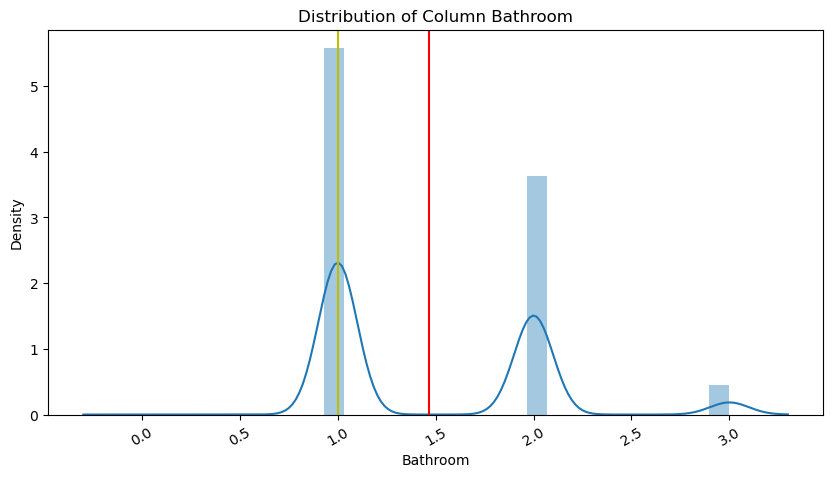

In [28]:
plt.figure(figsize = (10, 5))
plt.xticks(rotation = 30)
sns.distplot(df['Bathroom'])
plt.axvline(df['Bathroom'].mean(), color = 'r')
plt.axvline(df['Bathroom'].median(), color = 'y')
plt.title('Distribution of Column Bathroom')
plt.show()

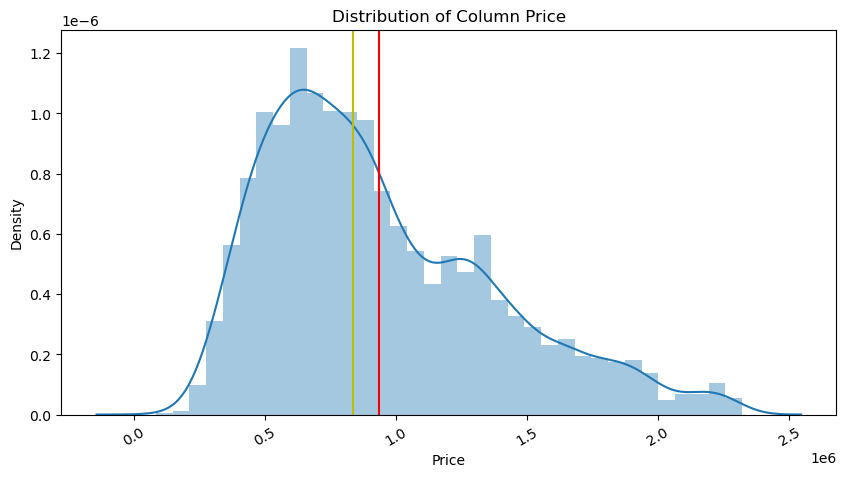

In [29]:
plt.figure(figsize = (10, 5))
plt.xticks(rotation = 30)
sns.distplot(df['Price'])
plt.axvline(df['Price'].mean(), color = 'r')
plt.axvline(df['Price'].median(), color = 'y')
plt.title('Distribution of Column Price')
plt.show()

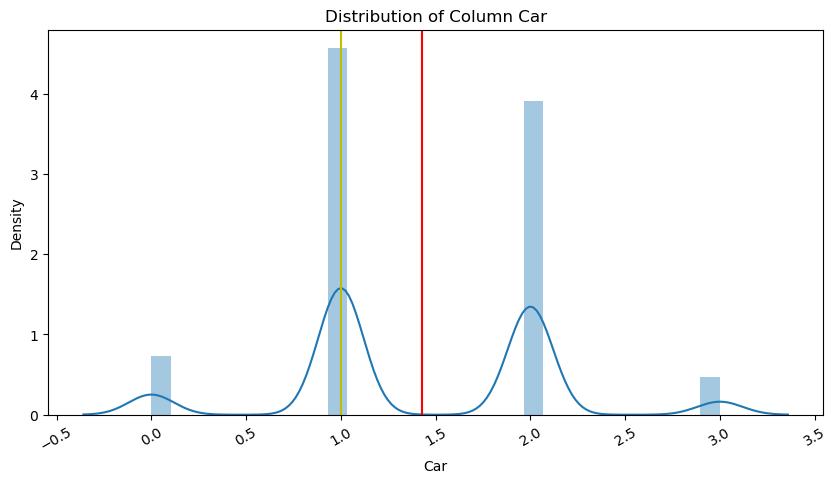

In [30]:
plt.figure(figsize = (10, 5))
plt.xticks(rotation = 30)
sns.distplot(df['Car'])
plt.axvline(df['Car'].mean(), color = 'r')
plt.axvline(df['Car'].median(), color = 'y')
plt.title('Distribution of Column Car')
plt.show()

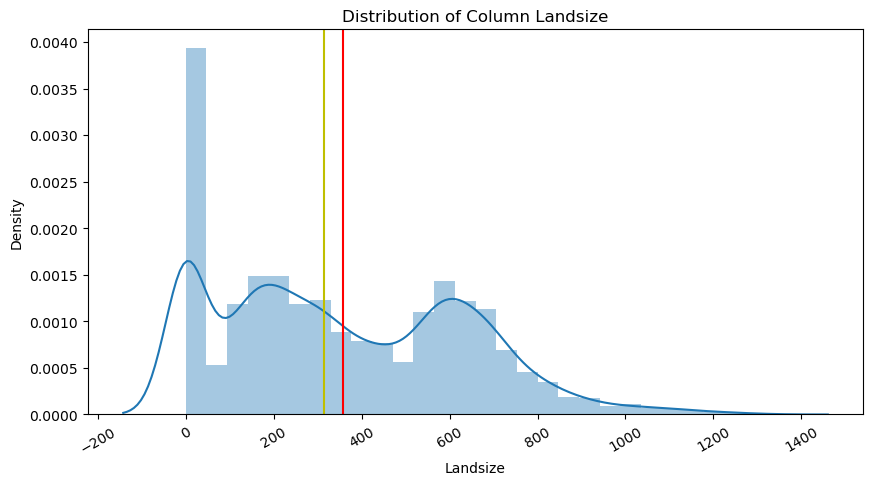

In [31]:
plt.figure(figsize = (10, 5))
plt.xticks(rotation = 30)
sns.distplot(df['Landsize'])
plt.axvline(df['Landsize'].mean(), color = 'r')
plt.axvline(df['Landsize'].median(), color = 'y')
plt.title('Distribution of Column Landsize')
plt.show()

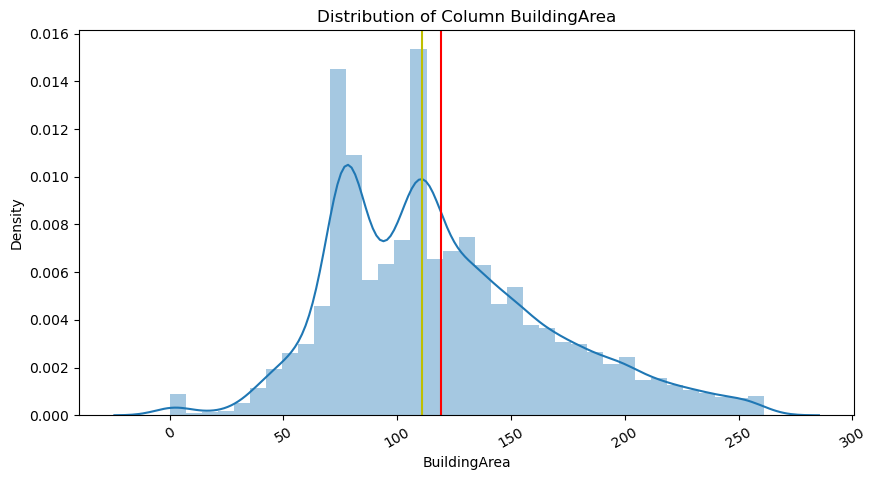

In [32]:
plt.figure(figsize = (10, 5))
plt.xticks(rotation = 30)
sns.distplot(df['BuildingArea'])
plt.axvline(df['BuildingArea'].mean(), color = 'r')
plt.axvline(df['BuildingArea'].median(), color = 'y')
plt.title('Distribution of Column BuildingArea')
plt.show()

> #### Report dispersions (variance, standard deviation, range)

> Column Price

In [66]:
# assign columns
columns_dispersion = ['Price','Bathroom','Bedroom2','Rooms','BuildingArea','Landsize']

# calculate dispersion
for i in columns_dispersion:
    print(i)
    print('Variance:', df[i].var())
    print('Standard Deviation:', df[i].std())
    print('Range:', df[i].max() - df[i].min(),'\n')

Price
Variance: 194840990357.4057
Standard Deviation: 441407.9636316111
Range: 2235000 

Bathroom
Variance: 0.3416998934096083
Standard Deviation: 0.5845510186541534
Range: 3 

Bedroom2
Variance: 0.7921841397863532
Standard Deviation: 0.8900472682876753
Range: 10 

Rooms
Variance: 0.7972789093244629
Standard Deviation: 0.892904759380564
Range: 9 

BuildingArea
Variance: 2259.832611705737
Standard Deviation: 47.53769674380256
Range: 261.0 

Landsize
Variance: 77439.25146152754
Standard Deviation: 278.27908915606207
Range: 1318 



In [33]:
variance_price = df['Price'].var()

# calculate the standard deviation
std_deviation_price = df['Price'].std()

# calculate the range
price_range = df['Price'].max() - df['Price'].min()

print("Variance Price:", variance_price)
print("Standard Deviation Price:", std_deviation_price)
print("Price Range:", price_range)

Variance Price: 194840990357.4057
Standard Deviation Price: 441407.9636316111
Price Range: 2235000


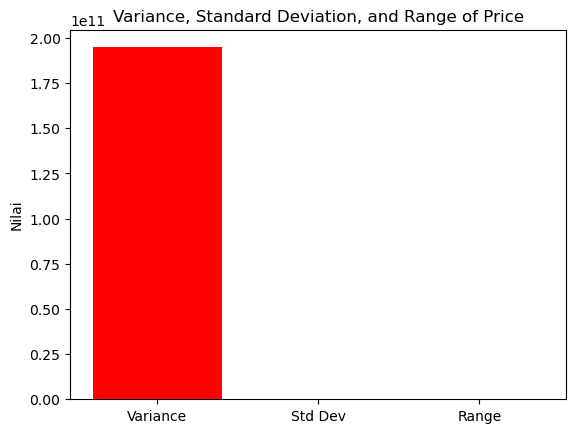

In [34]:
# Visualization of Variance, Standard Deviation, and Range of Price
plt.bar(['Variance', 'Std Dev', 'Range'], [variance_price, std_deviation_price, price_range], color=['r', 'g', 'b'])
plt.ylabel('Nilai')
plt.title('Variance, Standard Deviation, and Range of Price')
plt.show()

> Column Bathroom

In [35]:
variance_bathroom = df['Bathroom'].var()

# calculate the standard deviation
std_deviation_bathroom = df['Bathroom'].std()

# calculate the range
bathroom_range = df['Bathroom'].max() - df['Bathroom'].min()

print("Variance Bathroom:", variance_bathroom)
print("Standard Deviation Bathroom:", std_deviation_bathroom)
print("Bathroom Range:", bathroom_range)

Variance Bathroom: 0.3416998934096083
Standard Deviation Bathroom: 0.5845510186541534
Bathroom Range: 3


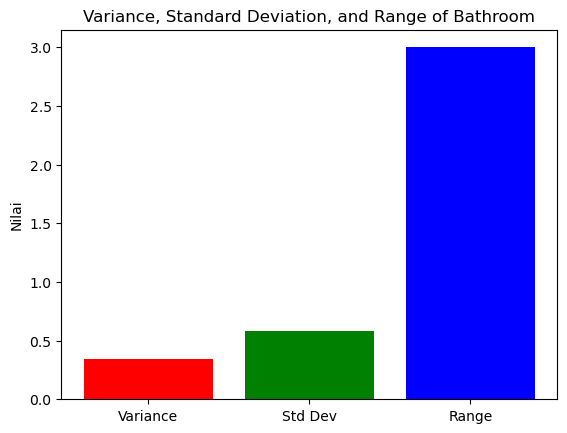

In [36]:
# Visualization of Variance, Standard Deviation, and Range of Bathroom
plt.bar(['Variance', 'Std Dev', 'Range'],
        [variance_bathroom, std_deviation_bathroom, bathroom_range],
        color=['r', 'g', 'b'])
plt.ylabel('Nilai')
plt.title('Variance, Standard Deviation, and Range of Bathroom')
plt.show()

> Column Bedroom2

In [37]:
variance_Bedroom2 = df['Bedroom2'].var()

# calculate the standard deviation
std_deviation_Bedroom2 = df['Bedroom2'].std()

# calculate the range
Bedroom2_range = df['Bedroom2'].max() - df['Bedroom2'].min()

print("Variance Bedroom2:", variance_Bedroom2)
print("Standard Deviation Bedroom2:", std_deviation_Bedroom2)
print("Bedroom2 Range:", Bedroom2_range)

Variance Bedroom2: 0.7921841397863532
Standard Deviation Bedroom2: 0.8900472682876753
Bedroom2 Range: 10


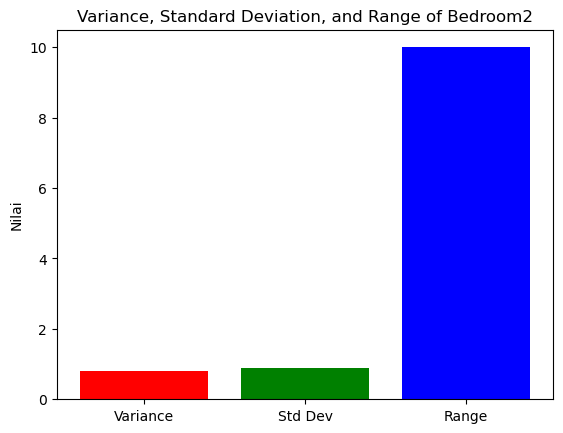

In [38]:
# Visualization of Variance, Standard Deviation, and Range of Bedroom2
plt.bar(['Variance', 'Std Dev', 'Range'],
        [variance_Bedroom2, std_deviation_Bedroom2, Bedroom2_range],
        color=['r', 'g', 'b'])
plt.ylabel('Nilai')
plt.title('Variance, Standard Deviation, and Range of Bedroom2')
plt.show()

> Column Rooms

In [39]:
variance_Rooms = df['Rooms'].var()

# calculate the standard deviation
std_deviation_Rooms = df['Rooms'].std()

# calculate the range
Rooms_range = df['Rooms'].max() - df['Rooms'].min()

print("Variance Rooms:", variance_Rooms)
print("Standard Deviation Rooms:", std_deviation_Rooms)
print("Rooms Range:", Rooms_range)

Variance Rooms: 0.7972789093244629
Standard Deviation Rooms: 0.892904759380564
Rooms Range: 9


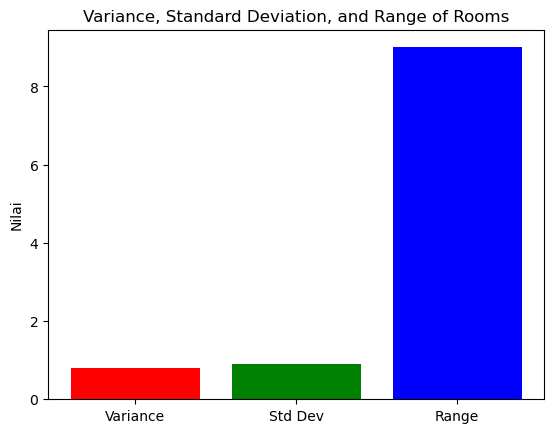

In [40]:
# Visualization of Variance, Standard Deviation, and Range of Rooms
plt.bar(['Variance', 'Std Dev', 'Range'],
        [variance_Rooms, std_deviation_Rooms, Rooms_range],
        color=['r', 'g', 'b'])
plt.ylabel('Nilai')
plt.title('Variance, Standard Deviation, and Range of Rooms')
plt.show()

> Column BuildingArea

In [41]:
variance_BuildingArea = df['BuildingArea'].var()

# calculate the standard deviation
std_deviation_BuildingArea = df['BuildingArea'].std()

# calculate the range
BuildingArea_range = df['BuildingArea'].max() - df['BuildingArea'].min()

print("Variance BuildingArea:", variance_BuildingArea)
print("Standard Deviation BuildingArea:", std_deviation_BuildingArea)
print("BuildingArea Range:", BuildingArea_range)

Variance BuildingArea: 2259.832611705737
Standard Deviation BuildingArea: 47.53769674380256
BuildingArea Range: 261.0


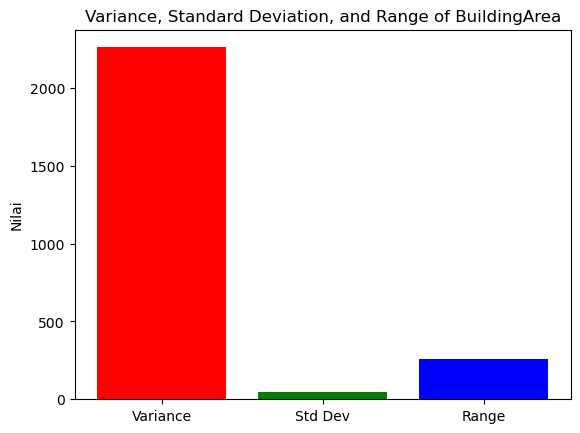

In [42]:
# Visualization of Variance, Standard Deviation, and Range of BuildingArea
plt.bar(['Variance', 'Std Dev', 'Range'],
        [variance_BuildingArea, std_deviation_BuildingArea, BuildingArea_range],
        color=['r', 'g', 'b'])
plt.ylabel('Nilai')
plt.title('Variance, Standard Deviation, and Range of BuildingArea')
plt.show()

> Column Landsize

In [43]:
variance_Landsize= df['Landsize'].var()

# calculate the standard deviation
std_deviation_Landsize= df['Landsize'].std()

# calculate the range
Landsize_range = df['Landsize'].max() - df['Landsize'].min()

print("Variance Landsize:", variance_Landsize)
print("Standard Deviation Landsize:", std_deviation_Landsize)
print("Landsize Range:",Landsize_range)

Variance Landsize: 77439.25146152754
Standard Deviation Landsize: 278.27908915606207
Landsize Range: 1318


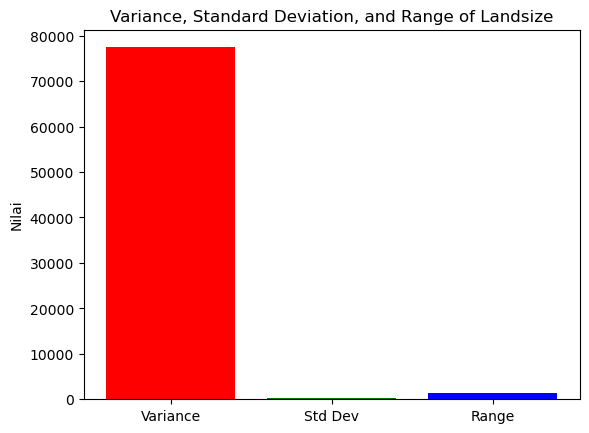

In [44]:
# Visualization of Variance, Standard Deviation, and Range of Landsize
plt.bar(['Variance', 'Std Dev', 'Range'],
        [variance_Landsize, std_deviation_Landsize, Landsize_range],
        color=['r', 'g', 'b'])
plt.ylabel('Nilai')
plt.title('Variance, Standard Deviation, and Range of Landsize')
plt.show()

> <h3>Conclusion:<h3>
>
> The results of these calculations provide an overview of the variation, distribution, and range in the price, bathroom, bedroom2, rooms, buildingarea, landsize columns in the data This is important for a better understanding of the characteristics of the data and can be used in further analyses or better decision-making related to the data.


> #### Distribution Analysis (Categorical variables)

In [45]:
# check the different (Suburb)
print(f"Counts for Suburb:")
print(df['Suburb'].value_counts())

# check the proportion
print(f"\nProportion for Suburb:")
print(df['Suburb'].value_counts(normalize=True))

Counts for Suburb:
Suburb
Reservoir         184
Richmond          149
Brunswick         134
Bentleigh East    128
Preston           118
                 ... 
Hurstbridge         1
Hallam              1
Officer             1
Warrandyte          1
Cranbourne          1
Name: count, Length: 294, dtype: int64

Proportion for Suburb:
Suburb
Reservoir         0.026395
Richmond          0.021374
Brunswick         0.019222
Bentleigh East    0.018362
Preston           0.016927
                    ...   
Hurstbridge       0.000143
Hallam            0.000143
Officer           0.000143
Warrandyte        0.000143
Cranbourne        0.000143
Name: proportion, Length: 294, dtype: float64


> <h3>Conclusion:<h3>
>
> From the information above, it is known that Counts for Suburbs shows the number of properties registered in certain suburbs. we can see, in Reservoir there are 184 properties listed, Richmond is 149, Brunswick is 134, Bentleigh East is 128, etc. These results provide an idea of ​​the distribution of the number of properties based on certain suburbs in the dataset. Suburbs with the largest number of properties (such as Reservoir and Richmond) may be the focus of further analysis.
>
> We can also see the proportion (as a percentage of the total) of properties listed in each suburb. Reservoirs are about 2.63% of the total properties in the dataset, Richmond is about 2.13%, Brunswick is about 1.9%, Bentleigh East is about 1.8%, etc. These results provide information about how much each suburb contributes to the total properties in the dataset. A higher proportion indicates a suburb that has more properties compared to other suburb.

In [46]:
# check the different (Regionname)
print(f"Counts for Regionname:")
print(df['Regionname'].value_counts())

# check the proportion
print(f"\nProportion for Regionname:")
print(df['Regionname'].value_counts(normalize=True))

Counts for Regionname:
Regionname
Southern Metropolitan         2305
Northern Metropolitan         2142
Western Metropolitan          1558
Eastern Metropolitan           700
South-Eastern Metropolitan     200
Eastern Victoria                23
Northern Victoria               22
Western Victoria                21
Name: count, dtype: int64

Proportion for Regionname:
Regionname
Southern Metropolitan         0.330656
Northern Metropolitan         0.307273
Western Metropolitan          0.223497
Eastern Metropolitan          0.100416
South-Eastern Metropolitan    0.028690
Eastern Victoria              0.003299
Northern Victoria             0.003156
Western Victoria              0.003012
Name: proportion, dtype: float64


> <h3>Conclusion:<h3>
>
> From the information above, it is known that Counts for Regionname shows the number of properties registered in a particular Regionname. Southern Metropolitan There are 2305 properties listed, Northern Metropolitan is 2142, Western Metropolitan is 1558, Eastern Metropolitan is 700, etc. Regionname with the highest number of properties (such as Southern Metropolitan) have a significant number of properties and may be the focus of further analysis.
>
> We can also see the proportion (as a percentage of the total) of properties listed in each Regionname. The proportion of properties in the Southern Metropolitan area is about 33.06% of the total properties in the dataset, Northern Metropolitan is about 30.72%, Western Metropolitan is about 22.3%, etc. This proportion description provides information about how much each region name contributes to the total properties in the dataset. A higher proportion indicates an area that has more properties compared to other areas.

> #### What's the trend in this matter?




In [47]:
# Change the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract year from 'Date' column
df['Year'] = df['Date'].dt.year

# Calculate the average property price per year
avg_price_year = df.groupby('Year')['Price'].mean().reset_index()

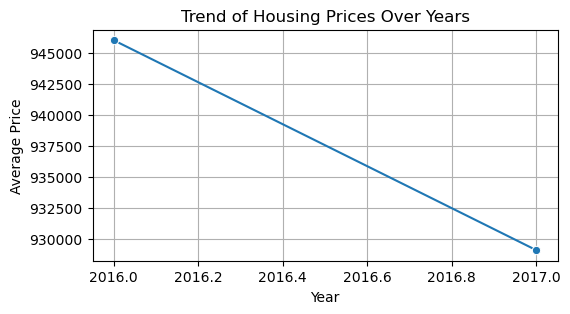

In [48]:
# Plot property price trends by year using Seaborn
plt.figure(figsize=(6, 3))
sns.lineplot(x='Year', y='Price', data=avg_price_year, marker='o')
plt.title('Trend of Housing Prices Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

> #### Where's the expensive side of town?

In [49]:
# finding the top 5 suburb with the highest average property price
price_by_suburb = df.groupby('Suburb')['Price'].mean().sort_values(ascending = False).head(5)
labels_suburb = price_by_suburb.index

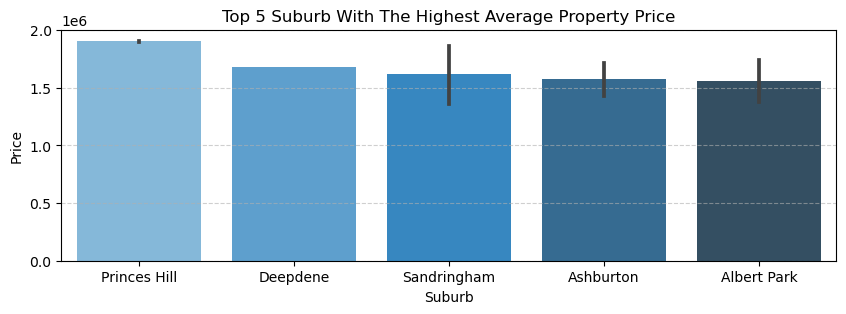

In [50]:
# visualizing it through barchart
plt.figure(figsize = (10,3))
sns.barplot(data = df,
            x = 'Suburb',
            y = 'Price',
            palette = 'Blues_d',
            order = labels_suburb,
            estimator = 'mean',
            saturation = 1
           )
plt.title('Top 5 Suburb With The Highest Average Property Price')
plt.xlabel('Suburb')
plt.ylabel('Price')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)

> #### Which Suburb Are Best to Buy In?

In [51]:
# Creating specified time columns
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

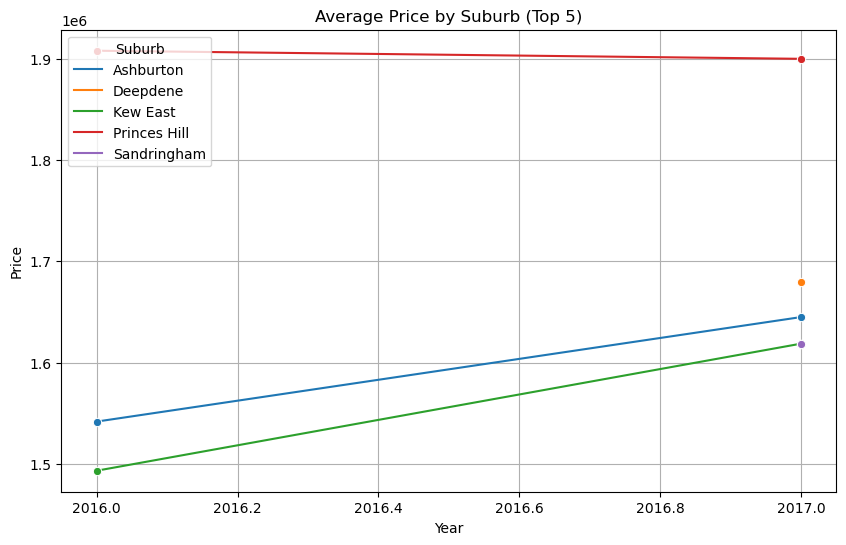

In [52]:
# Group by 'suburb' and 'year', calculate mean price
suburb_year_avg_price = df.groupby(['Suburb', 'Year'])['Price'].mean().reset_index()

# Filter to top 5 suburbs based on average price
top_5_suburbs = suburb_year_avg_price.groupby('Suburb')['Price'].mean().nlargest(5).index
suburb_year_avg_price_top5 = suburb_year_avg_price[suburb_year_avg_price['Suburb'].isin(top_5_suburbs)]

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=suburb_year_avg_price_top5, x='Year', y='Price', hue='Suburb', marker='o')

plt.title('Average Price by Suburb (Top 5)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(title='Suburb', loc='upper left')
plt.grid(True)
plt.show()

###Which ones are value for money?

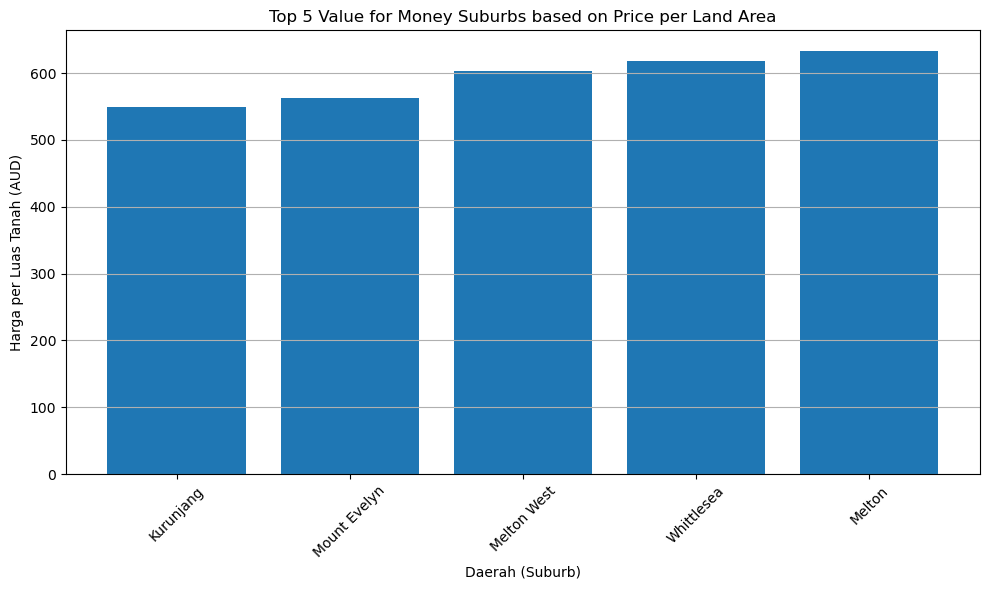

In [53]:
# Creating a column for Price per Landsize
df['price_per_land_size'] = df['Price'] / df['Landsize']

# Grouping the data based on suburb and calculating the average Price per Landsize
avg_price_per_land_size = df.groupby('Suburb')['price_per_land_size'].mean().reset_index()

# Finding the Top 5 suburb with the lowest average Price per Landsize (value for money)
value_for_money_suburbs = avg_price_per_land_size.nsmallest(5, 'price_per_land_size')

# Visualizing through barchart
plt.figure(figsize=(10, 6))
plt.bar(value_for_money_suburbs['Suburb'], value_for_money_suburbs['price_per_land_size'])
plt.ylabel('Harga per Luas Tanah (AUD)')
plt.xlabel('Daerah (Suburb)')
plt.title('Top 5 Value for Money Suburbs based on Price per Land Area')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Which Suitable Suburb for Buying a 2-Bedroom Unit?

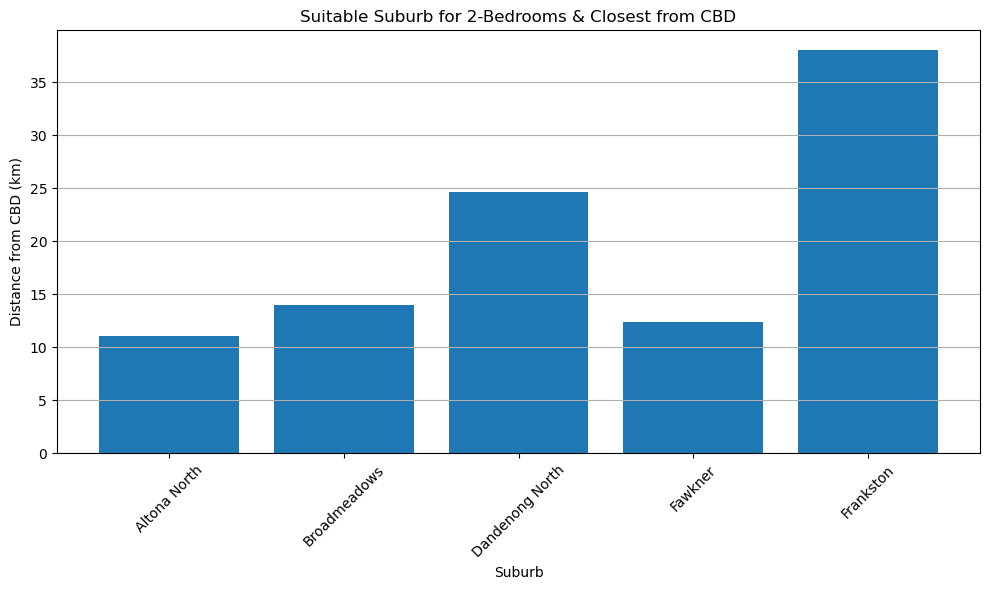

In [54]:
# Filter which only include 'Type' = 'u' with 2 bedrooms ('Rooms' = 2)
filtered_df = df[(df['Type'] == 'u') & (df['Rooms'] == 2)]

# Group the 'filtered_df' and calculate the mean price for each Suburb
mean_price_by_suburb = filtered_df.groupby('Suburb')['Price'].mean().reset_index()

# Sort 5 Suburb with the lowest price by the mean price in ascending order
lowest_price_suburbs = mean_price_by_suburb.nsmallest(5, 'Price')

# Filter the dataset only the selected 5 suburbs
filtered_df = filtered_df[filtered_df['Suburb'].isin(lowest_price_suburbs['Suburb'])]

# Group the filtered 'Suburb' and calculate the mean distance from the CBD for each suburb
mean_distance_by_suburb = filtered_df.groupby('Suburb')['Distance'].mean().reset_index()

# Use a bar chart to visualize the distance from the CBD for the selected suburbs
plt.figure(figsize=(10, 6))
plt.bar(mean_distance_by_suburb['Suburb'], mean_distance_by_suburb['Distance'])
plt.title('Suitable Suburb for 2-Bedrooms & Closest from CBD')
plt.xlabel('Suburb')
plt.ylabel('Distance from CBD (km)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 6. SUMMARY
> Summarize the analysis process:
> - Highlight key findings from the descriptive analysis.
> - Highlight any challenges encountered during the analysis and how they were addressed. (optional)
> - Provide potential insights or observations based on the analysis. (optional)

> #### Key Findings
> We have conducted a descriptive analysis to answer the questions provided. Here are our key findings:

> - Which suburbs are the best to buy in?
>> From the above diagram, it can be seen that the best suburb to buy is the city of kooyong

> - What's the trend in this matter?
>> From the visualization results, there is a decrease in the average property price from year to year.
> - Where's the expensive side of town?
>> From the visualization, we can conclude that the Prince Hills Suburb is most expensive side of town.
>
> - Which Suitable Suburb for Buying a 2-Bedroom Unit?
>> From the visualization we can see that the Suburb which has U Type and 2 bedrooms with lowest price but closest to the CBD is Althona North Suburb.
> - Which ones are value for money?
>> From the visualization we can see that the Suburb that have the lowest Landsize prices is Kurunjang

> #### Challenges
> Throughout the data analysis process, we encountered a couple of challenges:
> - Missing values
>> The dataset contained some instances of missing data, which needed to be handled before proceeding with our analysis. To tackle this, we discussed various approaches to address these issue, tailoring our strategies to the specific characteristics of each column.
> - Outliers
>> Once missing values were handled, we identified outliers within the dataset. While there weren' many outliers, they have the potential to skew our analysis results. To counter this, we devised tailored strategies for managing outliers, ensuring their impact on our analysis was minimized.

### 7. EXPORT THE CLEANED DATA
> - Export the cleaned data to a CSV file.
>
> - Ensure that the data is formatted correctly for Google Sheets import.

In [55]:
df.to_csv('cleaned_melb_data.csv', index=False)